## Receiver Operating Characteristic (ROC) Curve

ROC curve is a commonly used tool to evaluate __binary classifier__. It is used to compare different models. ROC curve has __False Positive Rate__ or X-axis and __True Positive Rate__ on Y-axis. 
Where,

$$\text{False Positive Rate} = \frac{FP}{FP + TN}$$
$$\text{True Positive Rate} = \frac{TP}{TP + FN}$$

In [10]:
from __future__ import division
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X, y = make_classification(n_samples=1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)

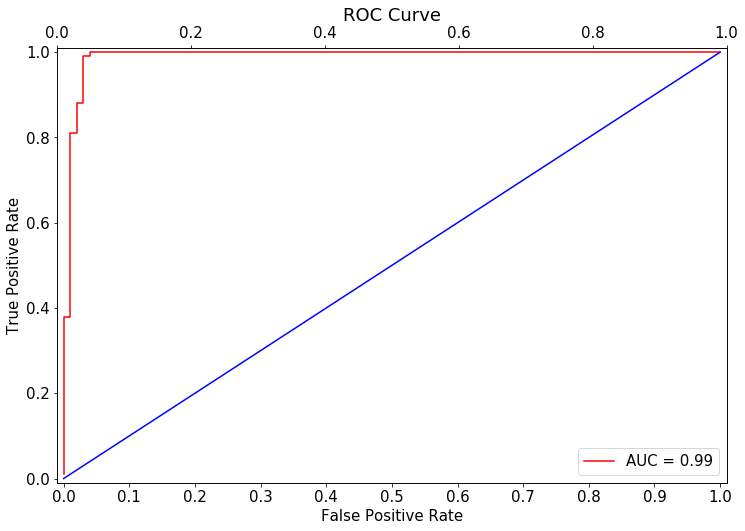

In [21]:
import matplotlib
font = {'family' : 'normal',
        'size'   : 15}
matplotlib.rc('font', **font)

import matplotlib.pyplot as plt
from sklearn.preprocessing import Binarizer
from sklearn.metrics import auc, roc_curve

fig = plt.figure(figsize=(12, 8))
values = []
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

def plot_roc(y_test, clf):
    y_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, ths = roc_curve(y_test, y_pred)
    auc_val = auc(fpr, tpr)
    ax1.plot(fpr, tpr, color="red", label="AUC = {0:.2f}".format(auc_val))
    ax1.set_xlabel("False Positive Rate")
    ax1.set_ylabel("True Positive Rate")
    plt.title("ROC Curve\n")
    ax1.set_xlim((-0.01, 1.01))
    ax1.set_ylim((-0.01, 1.01))
    ax1.set_xticks(np.linspace(0, 1, 11))
    ax1.plot([0, 1], [0, 1], color="blue")
    ax1.legend(loc="lower right")
    plt.show()

plot_roc(y_test, clf)


## Setting optimum threshold

Most of the time we are inclined towards setting the threshold of $0.5$ for classification tasks, but can we do better? 

Using various thresholds we can output the accuracy and select the threshold with highest accuracy. 